In [71]:
import pandas as pd 
import pickle 
import seaborn as  sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

def mean_of_each_fold(df,metric):
    t= df[df["metric"]==metric].groupby(["Dataset Name","Filtering Algorithm","Number of features selected (K)","Learning algorithm"]).mean().reset_index()
    return t
def best_of_dataset(df):
    idx=df.groupby(['Dataset Name'])['value'].idxmax()
    t=df.loc[idx]
    return t
    
def plot_diff(merged_df,metric):
    plt.figure(figsize=(20,10))
    sorted_df= merged_df.sort_values(by=["diff"],ascending=False)
    colors = [1 if c >= 0 else 0 for c in sorted_df["diff"]]

    ax=sns.barplot(x="Dataset Name",y="diff",data=sorted_df,hue=colors)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
    #name the axis
    plt.xlabel('Dataset Name')
    plt.ylabel('Difference in preformance')
    plt.title("Difference in" +metric+" performance before and after using \naugmentation techniques, between different algorithms")

    plt.show()

In [72]:
column= ['metric', 'value', 'infrence_time', 'Learning algorithm', 'Number of features selected (K)', 'chosen_features', 'Selected Features scores',
 'Filtering Algorithm', 'Fold', 'fs_time', 'Dataset Name', 'Number of samples', 'Original Number of features', 'CV Method']
 
from os import listdir
from os.path import isfile, join


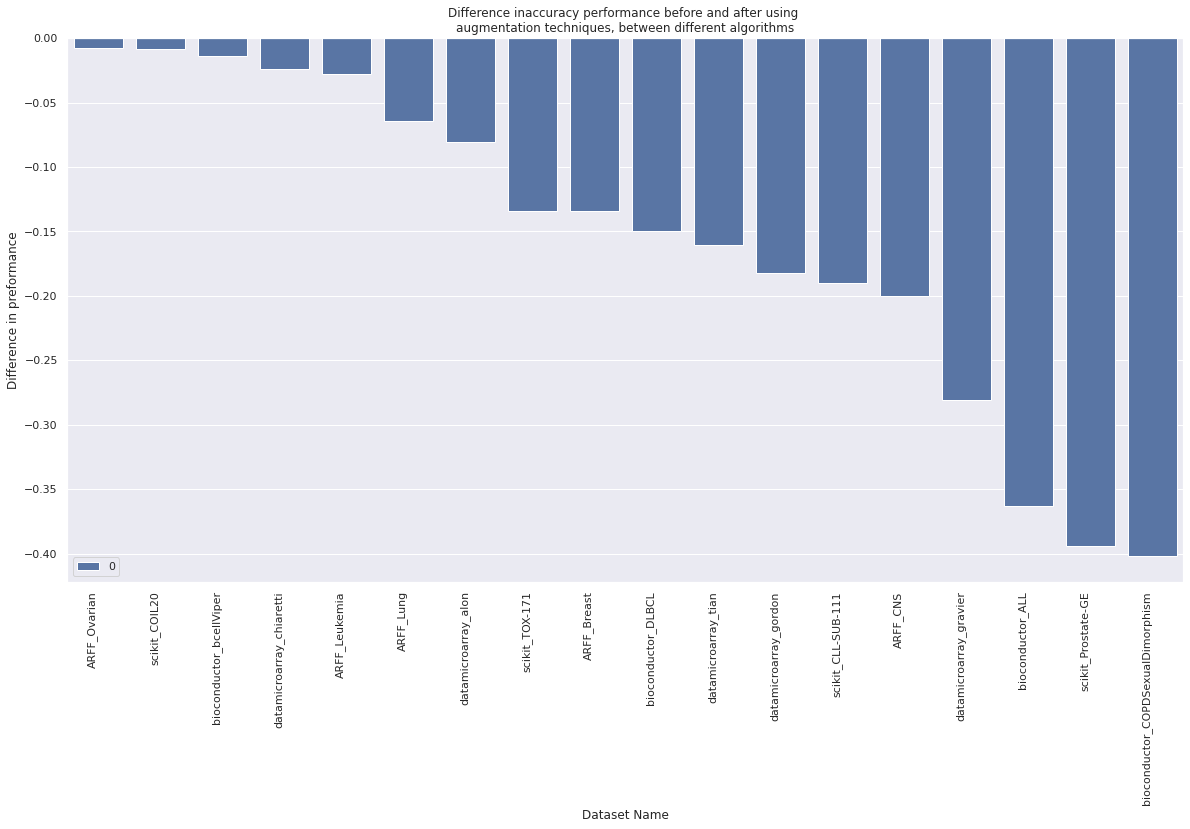

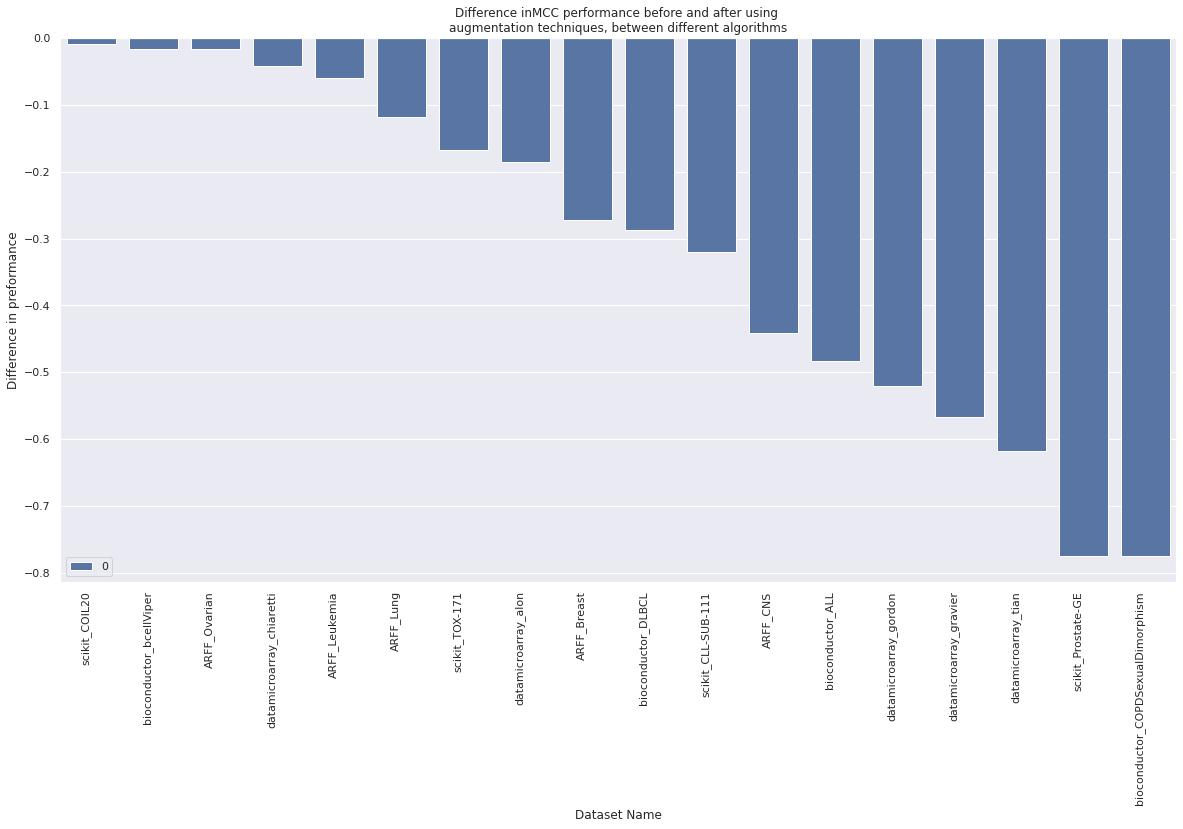

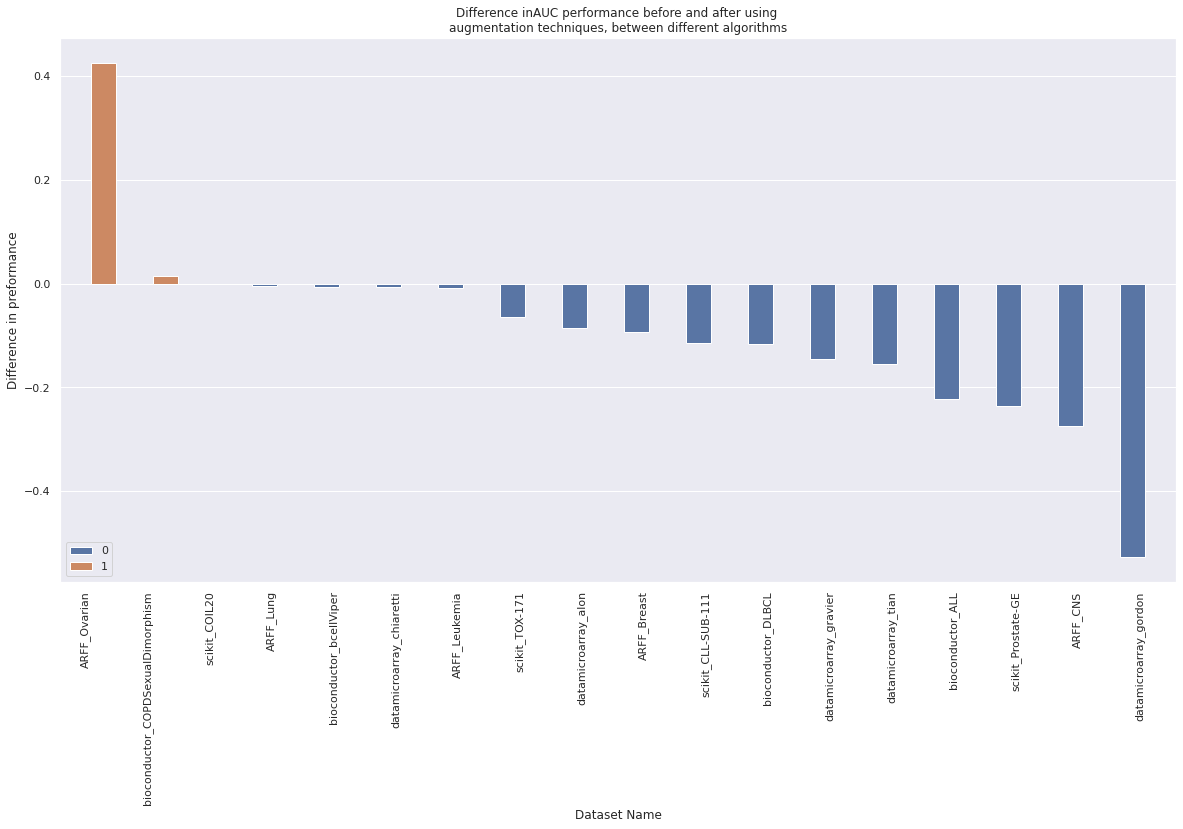

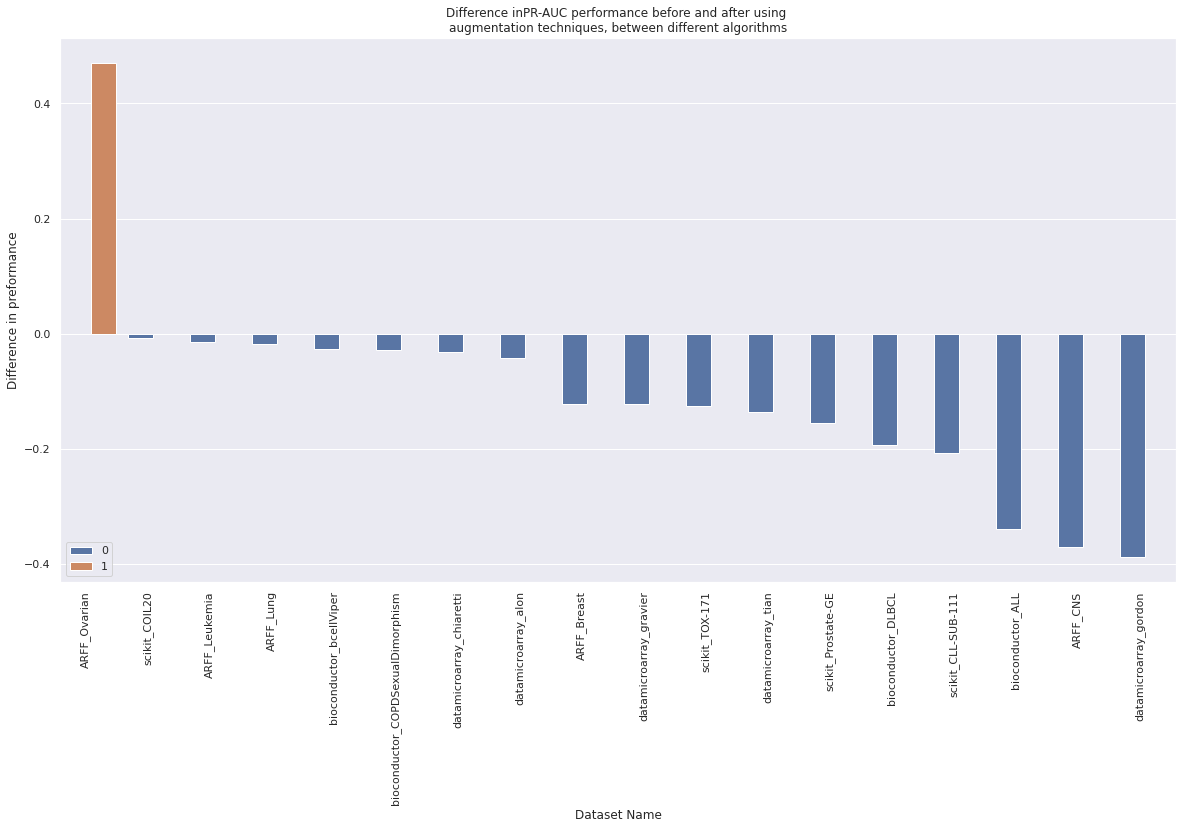

In [73]:
for metric in ['accuracy', 'MCC', 'AUC', 'PR-AUC']:
    files= [f for f in listdir("augmenrataion_res copy") if isfile(join("augmenrataion_res copy", f))]
    all_files=[]
    for file in files:
        all_files.append(pd.read_csv("augmenrataion_res copy/"+file,header=None))
    df= pd.concat(all_files, ignore_index=True)
    df.columns=column 
    mean_auc_df_aug= mean_of_each_fold(df,metric)


    files= [f for f in listdir("results copy") if isfile(join("results copy", f))]
    all_files=[]
    for file in files:
        all_files.append(pd.read_csv("results copy/"+file,header=0))
    df= pd.concat(all_files, ignore_index=True)
    df.rename(columns={"index":"metric"},inplace=True)
    mean_auc_df= mean_of_each_fold(df,metric)


    best_df= best_of_dataset(mean_auc_df)

    merged_df= mean_auc_df_aug.merge(best_df[["Dataset Name","value"]],on=["Dataset Name"])
    merged_df["diff"]= merged_df["value_x"]-merged_df["value_y"]
    plot_diff(merged_df,metric)